In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cd ..

c:\Users\CHA SOOBIN\WD


In [4]:
train = pd.read_csv('./Data/traffic_prediction_data/train.csv')


In [ ]:
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [ ]:
len(train)

4701217

In [ ]:
train.head() 

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
430379,TRAIN_0430379,20210901,수,16,3,106,지방도1132호선,0,0,70.0,...,3,진동1로,33.518987,126.568861,있음,동중입구,33.519726,126.571488,없음,37.0
369019,TRAIN_0369019,20210901,수,11,1,103,일반국도16호선,0,0,50.0,...,0,모살물교,33.312509,126.703863,없음,한남교,33.312449,126.696173,없음,36.0
1132647,TRAIN_1132647,20210901,수,4,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,43.0
4543127,TRAIN_4543127,20210901,수,16,1,107,-,0,0,60.0,...,0,서중2교,33.331742,126.676431,없음,한남교차로,33.325096,126.665698,없음,55.0
3428956,TRAIN_3428956,20210901,수,9,1,103,일반국도16호선,0,0,50.0,...,3,월산2교,33.260056,126.490987,없음,월산2교,33.259995,126.491306,없음,53.0


In [ ]:
train.tail()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
2053638,TRAIN_2053638,20220731,일,21,1,107,중문로,0,0,50.0,...,0,신양약방,33.251716,126.425612,없음,중문한의원,33.251884,126.423200,없음,21.0
2748124,TRAIN_2748124,20220731,일,12,3,107,연삼로,0,0,70.0,...,0,제2거로교,33.508464,126.558231,없음,거로사거리,33.507349,126.556173,있음,36.0
2447938,TRAIN_2447938,20220731,일,12,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,24.0
3749761,TRAIN_3749761,20220731,일,1,2,103,일반국도16호선,0,0,60.0,...,0,서홍교,33.264112,126.554043,없음,서흥동사무소,33.263685,126.550978,없음,37.0
4680098,TRAIN_4680098,20220731,일,21,2,107,-,0,0,80.0,...,0,해안육교,33.465863,126.456384,없음,해안교,33.466433,126.454583,없음,52.0


train data 의 경우 2021년 09월 01일 ~ 2022년 07월 31일의 데이터가 있다. 총 11개월의 데이터가 있다. 

In [ ]:
len(test)

291241

In [ ]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
58553,TEST_058553,20220801,월,17,1,103,일반국도16호선,0,0,60.0,...,0.0,3,제2회수교,33.261655,126.452658,없음,제2회수교,33.261690,126.453102,없음
45008,TEST_045008,20220801,월,22,3,103,일반국도12호선,0,0,70.0,...,0.0,0,인제사거리,33.507384,126.540331,있음,영락교회,33.509729,126.543144,있음
139434,TEST_139434,20220801,월,19,3,106,지방도1132호선,0,0,70.0,...,0.0,0,시청입구1,33.249029,126.509864,없음,대륜동주민센터,33.248716,126.510996,있음
186397,TEST_186397,20220801,월,17,3,103,일반국도12호선,0,0,70.0,...,0.0,0,인제사거리,33.507384,126.540331,있음,문예회관사거리,33.504059,126.536446,있음
154249,TEST_154249,20220801,월,15,2,103,일반국도16호선,0,0,60.0,...,0.0,0,서흥동사무소,33.263685,126.550978,없음,서홍교,33.264112,126.554043,없음


In [ ]:
test.tail()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
217025,TEST_217025,20220831,수,8,2,107,태평로,0,0,50.0,...,0.0,0,팔도철물건재,33.245375,126.565805,없음,서현주택,33.245565,126.566228,없음
106516,TEST_106516,20220831,수,6,3,103,일반국도12호선,0,0,70.0,...,0.0,0,동광장교,33.503254,126.534803,없음,문예회관사거리,33.504059,126.536446,있음
106547,TEST_106547,20220831,수,3,3,103,일반국도12호선,0,0,70.0,...,0.0,0,인제사거리,33.507384,126.540331,있음,영락교회,33.509729,126.543144,있음
281844,TEST_281844,20220831,수,13,2,103,일반국도11호선,0,0,60.0,...,0.0,0,하례입구삼거리,33.300796,126.600332,없음,돈내코유원지입구,33.295611,126.595226,없음
87204,TEST_087204,20220831,수,16,2,103,일반국도16호선,0,0,60.0,...,0.0,0,동홍5차아파트504동,33.264937,126.563554,없음,동홍5차아파트528동,33.264586,126.561830,없음


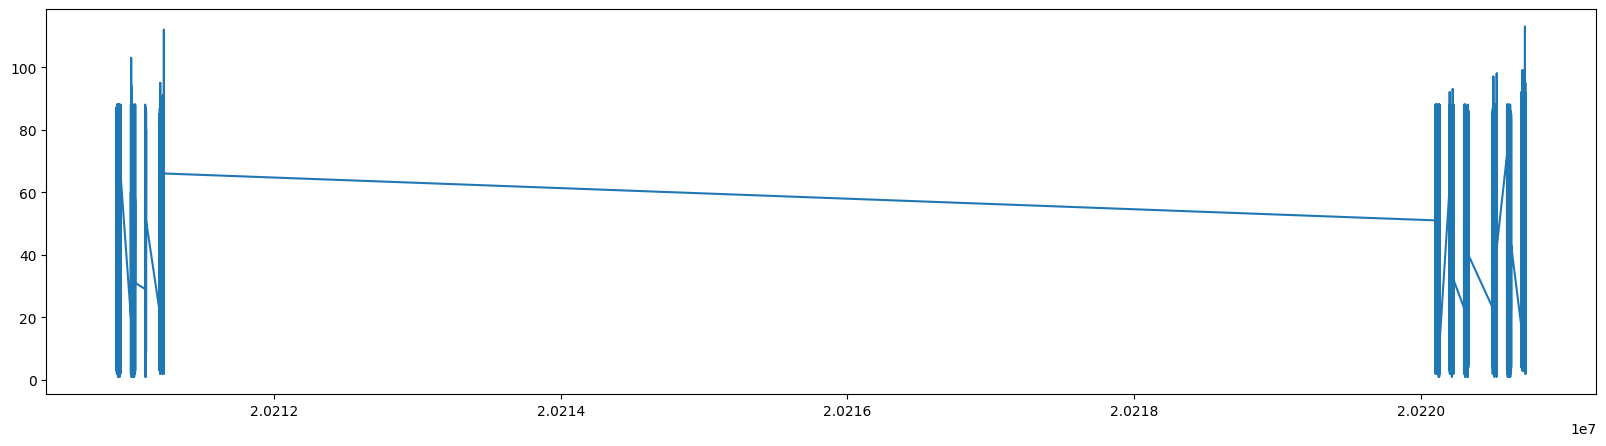

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train.base_date, train.target)
plt.show()

In [5]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
430379,TRAIN_0430379,20210901,수,16,3,106,지방도1132호선,0,0,70.0,...,3,진동1로,33.518987,126.568861,있음,동중입구,33.519726,126.571488,없음,37.0
369019,TRAIN_0369019,20210901,수,11,1,103,일반국도16호선,0,0,50.0,...,0,모살물교,33.312509,126.703863,없음,한남교,33.312449,126.696173,없음,36.0
1132647,TRAIN_1132647,20210901,수,4,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,43.0
4543127,TRAIN_4543127,20210901,수,16,1,107,-,0,0,60.0,...,0,서중2교,33.331742,126.676431,없음,한남교차로,33.325096,126.665698,없음,55.0
3428956,TRAIN_3428956,20210901,수,9,1,103,일반국도16호선,0,0,50.0,...,3,월산2교,33.260056,126.490987,없음,월산2교,33.259995,126.491306,없음,53.0


In [8]:
train.groupby("base_hour").mean()

,base_date,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_hour,,,,,,,,,,,,,,,
0,2.021598e+07,1.871593,104.867889,0.000065,0.298661,61.940931,0.0,5676.840644,0.0,0.626922,33.387348,126.525435,33.387351,126.525471,48.742200
1,2.021696e+07,1.888579,104.835012,0.000005,0.298235,62.224806,0.0,5644.792244,0.0,0.630129,33.388967,126.525017,33.388978,126.525060,49.763300
2,2.021702e+07,1.913354,104.780690,0.000006,0.313887,62.689964,0.0,5634.325132,0.0,0.637891,33.391513,126.524121,33.391511,126.524138,50.278658
3,2.021697e+07,1.927330,104.740852,0.000000,0.313746,63.072631,0.0,5715.312496,0.0,0.648046,33.393268,126.524342,33.393278,126.524349,50.543254
4,2.021699e+07,1.898224,104.769131,0.000024,0.310962,62.728879,0.0,5783.482975,0.0,0.645344,33.391435,126.528397,33.391432,126.528398,49.747525
5,2.021692e+07,1.868082,104.854109,0.000077,0.287741,62.068813,0.0,5769.630317,0.0,0.634871,33.388363,126.527813,33.388362,126.527813,47.201140
6,2.021675e+07,1.846255,104.911571,0.000206,0.275148,61.585488,0.0,5740.607545,0.0,0.626551,33.385966,126.525467,33.385948,126.525476,45.549029
7,2.021669e+07,1.831891,104.965704,0.000402,0.262854,61.210483,0.0,5657.978208,0.0,0.616967,33.383995,126.522489,33.383987,126.522498,43.682268
8,2.021673e+07,1.824154,105.001798,0.000471,0.254598,60.947864,0.0,5594.729412,0.0,0.608441,33.382723,126.520890,33.382727,126.520900,41.656292


In [10]:
train.groupby("road_rating").mean()

,base_date,base_hour,lane_count,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
road_rating,,,,,,,,,,,,,,,
103,2.021664e+07,11.722261,1.910228,0.000000,0.579125,65.105730,0.0,7123.190574,0.0,0.748435,33.402528,126.515343,33.402537,126.515359,46.388468
106,2.021665e+07,11.863483,1.767779,0.000000,0.000000,62.395049,0.0,6998.660958,0.0,0.787808,33.407226,126.568335,33.407194,126.568319,48.021548
107,2.021686e+07,12.248514,1.777995,0.001415,0.000000,55.302841,0.0,2728.556061,0.0,0.328749,33.345568,126.502048,33.345580,126.502068,34.701408
